# 

# Prediction of House Price in USA

**Project Objective:** The project aims to develop an advanced machine learning model to forecast residential property values. Key factors influencing the housing market, including Interest Rates, Unemployment Rate, GDP, Mortgage Rate, Population, etc, will be analyzed. The predictive model, employing regression or ensemble methods, will undergo rigorous training on historical data. The project seeks to provide stakeholders, including homebuyers, sellers, and investors, with a reliable tool to anticipate market changes. Deliverables include a predictive model, an interactive dashboard, and a comprehensive report, contributing to a more transparent and informed real estate landscape.

# 

## Importing Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import warnings
warnings.filterwarnings ('ignore')

pd.reset_option('display.max_columns')

## Importing Datasets

#### Dataset - 1

In [2]:
df0 = pd.read_csv("GDP.csv")
df0.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [3]:
df0.shape

(307, 2)

In [4]:
df0.tail()

,DATE,GDP
302,2022-07-01,25994.639
303,2022-10-01,26408.405
304,2023-01-01,26813.601
305,2023-04-01,27063.012
306,2023-07-01,27644.463


#### Filling values for all dates

In [5]:
# Convert the 'DATE' column to datetime format if it's not already in datetime format
df0['DATE'] = pd.to_datetime(df0['DATE'])

# Create a date range from the start date to the end date
date_range = pd.date_range(start='1947-01-01', end='2023-07-01', freq='MS')  # MS stands for Month Start

# Reindex the DataFrame with the new date range
df0 = df0.set_index('DATE').reindex(date_range)

# Fill missing values with the previous row's values
df0['GDP'] = df0['GDP'].fillna(method='ffill')

# Reset the index to make 'DATE' a column again
df0 = df0.reset_index()

# Reset the index to make 'DATE' a column again
df0 = df0.reset_index().rename(columns={'index': 'DATE'})

# dropping index
df0 = df0.drop(columns=['level_0'])

# Display the resulting DataFrame
df0

,DATE,GDP
0,1947-01-01,243.164
1,1947-02-01,243.164
2,1947-03-01,243.164
3,1947-04-01,245.968
4,1947-05-01,245.968
...,...,...
914,2023-03-01,26813.601
915,2023-04-01,27063.012
916,2023-05-01,27063.012
917,2023-06-01,27063.012


In [6]:
df0.columns

Index(['DATE', 'GDP'], dtype='object')

##### Dataset link: https://fred.stlouisfed.org/series/GDP

#### Dataset - 2

In [7]:
df1 = pd.read_csv("Monthly_Macroeconomic_Factors.csv")
df1.head()

,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
0,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
2,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
3,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
4,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1


In [8]:
df1.shape

(423, 9)

##### Dataset link: https://www.kaggle.com/datasets/faryarmemon/usa-housing-market-factors

#### Dataset - 3

In [9]:
df2 = pd.read_csv("INTDSRUSM193N.csv")
df2.rename(columns={'INTDSRUSM193N': 'Interest_Rates'}, inplace=True)
df2.head()

,DATE,Interest_Rates
0,1950-01-01,1.5
1,1950-02-01,1.5
2,1950-03-01,1.5
3,1950-04-01,1.5
4,1950-05-01,1.5


In [10]:
df2.shape

(860, 2)

##### Dataset link: https://fred.stlouisfed.org/series/INTDSRUSM193N

#### Dataset - 4

In [11]:
df3 = pd.read_csv("FPCPITOTLZGUSA.csv")
df3.rename(columns={'FPCPITOTLZGUSA': 'Inflation'}, inplace=True)
df3.head()

,DATE,Inflation
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912


In [12]:
df3.shape

(63, 2)

#### Filling values for all dates

In [13]:
# Convert the 'DATE' column to datetime format if it's not already in datetime format
df3['DATE'] = pd.to_datetime(df3['DATE'])

# Create a date range from the start date to the end date
date_range = pd.date_range(start='1960-01-01', end='2023-07-01', freq='MS')  # MS stands for Month Start

# Reindex the DataFrame with the new date range
df3 = df3.set_index('DATE').reindex(date_range)

# Fill missing values with the previous row's values
df3['Inflation'] = df3['Inflation'].fillna(method='ffill')

# Reset the index to make 'DATE' a column again
df3 = df3.reset_index()

# Reset the index to make 'DATE' a column again
df3 = df3.reset_index().rename(columns={'index': 'DATE'})

# dropping index
df3 = df3.drop(columns=['level_0'])

# Display the resulting DataFrame
df3

,DATE,Inflation
0,1960-01-01,1.457976
1,1960-02-01,1.457976
2,1960-03-01,1.457976
3,1960-04-01,1.457976
4,1960-05-01,1.457976
...,...,...
758,2023-03-01,8.002800
759,2023-04-01,8.002800
760,2023-05-01,8.002800
761,2023-06-01,8.002800


In [14]:
df3.columns

Index(['DATE', 'Inflation'], dtype='object')

##### Dataset link: https://fred.stlouisfed.org/series/FPCPITOTLZGUSA

#### Dataset - 5

In [15]:
df4 = pd.read_csv("SPPOPGROWUSA.csv")
df4.rename(columns={'SPPOPGROWUSA': 'Population_Growth'}, inplace=True)
df4.head()

,DATE,Population_Growth
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172


In [16]:
df4.shape

(62, 2)

#### Filling values for all dates

In [17]:
# Convert the 'DATE' column to datetime format if it's not already in datetime format
df4['DATE'] = pd.to_datetime(df4['DATE'])

# Create a date range from the start date to the end date
date_range = pd.date_range(start='1961-01-01', end='2023-07-01', freq='MS')  # MS stands for Month Start

# Reindex the DataFrame with the new date range
df4 = df4.set_index('DATE').reindex(date_range)

# Fill missing values with the previous row's values
df4['Population_Growth'] = df4['Population_Growth'].fillna(method='ffill')

# Reset the index to make 'DATE' a column again
df4 = df4.reset_index()

# Reset the index to make 'DATE' a column again
df4 = df4.reset_index().rename(columns={'index': 'DATE'})

# dropping index
df4 = df4.drop(columns=['level_0'])

# Display the resulting DataFrame
df4

,DATE,Population_Growth
0,1961-01-01,1.657730
1,1961-02-01,1.657730
2,1961-03-01,1.657730
3,1961-04-01,1.657730
4,1961-05-01,1.657730
...,...,...
746,2023-03-01,0.377565
747,2023-04-01,0.377565
748,2023-05-01,0.377565
749,2023-06-01,0.377565


In [18]:
df4.columns

Index(['DATE', 'Population_Growth'], dtype='object')

##### Dataset link: https://fred.stlouisfed.org/series/SPPOPGROWUSA

# 

### Checking Null Values

In [19]:
df0.isnull().sum().sum()

0

In [20]:
df1.isnull().sum().sum()

0

In [21]:
df2.isnull().sum().sum()

0

In [22]:
df3.isnull().sum().sum()

0

In [23]:
df4.isnull().sum().sum()

0

# 

## Merging Dataframes

In [24]:
# Convert the 'DATE' columns to datetime format
df0['DATE'] = pd.to_datetime(df0['DATE'])
df1['Date'] = pd.to_datetime(df1['Date'])
df2['DATE'] = pd.to_datetime(df2['DATE'])
df3['DATE'] = pd.to_datetime(df3['DATE'])
df4['DATE'] = pd.to_datetime(df4['DATE'])

# Merge DataFrames
merged_df0 = pd.merge(df0, df1,left_on='DATE', right_on='Date', how='inner')
merged_df1 = pd.merge(merged_df0, df2, on='DATE', how='inner')
merged_df2 = pd.merge(merged_df1, df3, on='DATE', how='inner')
merged_df3 = pd.merge(merged_df2, df4, on='DATE', how='inner')

# Display the resulting DataFrame
merged_df3.head()

,DATE,GDP,Date,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Inflation,Population_Growth
0,1987-01-01,4722.156,1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5,5.5,3.664563,0.893829
1,1987-02-01,4722.156,1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1,5.5,3.664563,0.893829
2,1987-03-01,4722.156,1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0,5.5,3.664563,0.893829
3,1987-04-01,4806.160,1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2,5.5,3.664563,0.893829
4,1987-05-01,4806.160,1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1,5.5,3.664563,0.893829


In [25]:
merged_df3 = merged_df3.drop(columns=['Date'])

In [26]:
pd.set_option('display.max_columns', None)
df = merged_df3
df.head()

,DATE,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Inflation,Population_Growth
0,1987-01-01,4722.156,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5,5.5,3.664563,0.893829
1,1987-02-01,4722.156,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1,5.5,3.664563,0.893829
2,1987-03-01,4722.156,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0,5.5,3.664563,0.893829
3,1987-04-01,4806.160,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2,5.5,3.664563,0.893829
4,1987-05-01,4806.160,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1,5.5,3.664563,0.893829


# 

## EDA

In [27]:
df.columns

Index(['DATE', 'GDP', 'House_Price_Index', 'Stock_Price_Index',
       'Consumer_Price_Index', 'Population', 'Unemployment_Rate', 'Real_GDP',
       'Mortgage_Rate', 'Real_Disposable_Income', 'Interest_Rates',
       'Inflation', 'Population_Growth'],
      dtype='object')

In [28]:
df.shape

(416, 13)

In [29]:
df.isnull().sum().sum()

0

In [30]:
df.dtypes

DATE                      datetime64[ns]
GDP                              float64
House_Price_Index                float64
Stock_Price_Index                float64
Consumer_Price_Index             float64
Population                       float64
Unemployment_Rate                float64
Real_GDP                         float64
Mortgage_Rate                    float64
Real_Disposable_Income           float64
Interest_Rates                   float64
Inflation                        float64
Population_Growth                float64
dtype: object

In [31]:
df.describe()

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Inflation,Population_Growth
count,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,12535.575959,132.635087,63.852528,80.322240,1.848358e+08,5.889663,2.447002,6.373083,10447.097356,3.244423,2.607114,0.933215
std,5226.617101,49.420455,34.373933,18.614505,1.765276e+07,1.648574,6.174085,2.193070,2778.444209,2.167255,1.215541,0.248906
min,4722.156000,63.735000,13.357500,46.916470,1.539680e+08,3.500000,-71.284950,2.684000,5967.200000,0.250000,-0.355546,0.156747
25%,7683.125000,81.424000,30.483310,64.605067,1.674218e+08,4.700000,1.156902,4.335625,7775.650000,0.957500,1.640043,0.735563
50%,12112.815000,137.884500,62.641115,79.551255,1.883395e+08,5.550000,2.804785,6.271000,10596.450000,3.000000,2.677237,0.927797
75%,16477.361500,173.367750,88.610512,97.604602,2.017260e+08,6.700000,4.180675,7.916875,12395.450000,5.000000,3.263672,1.148340
max,23828.973000,268.855000,156.607790,115.420830,2.067800e+08,14.700000,48.355870,11.260000,19119.500000,7.000000,5.397956,1.386886


### Visual Representation

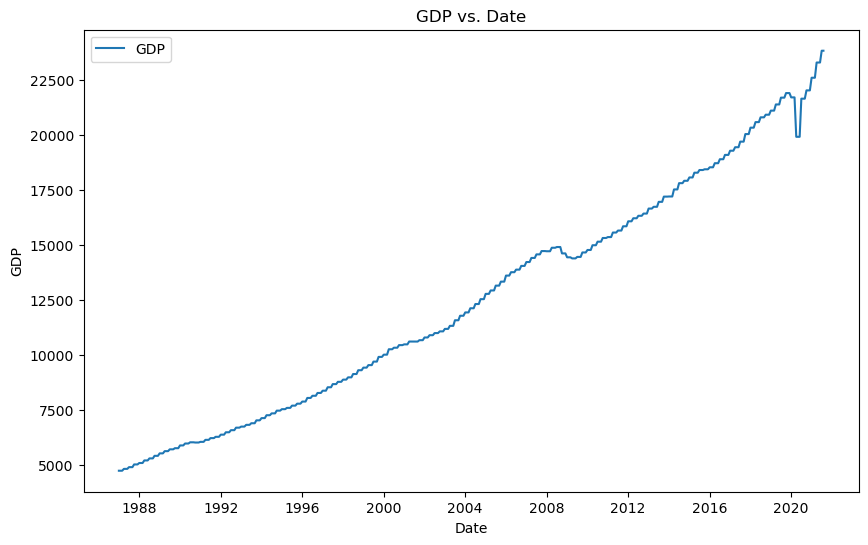

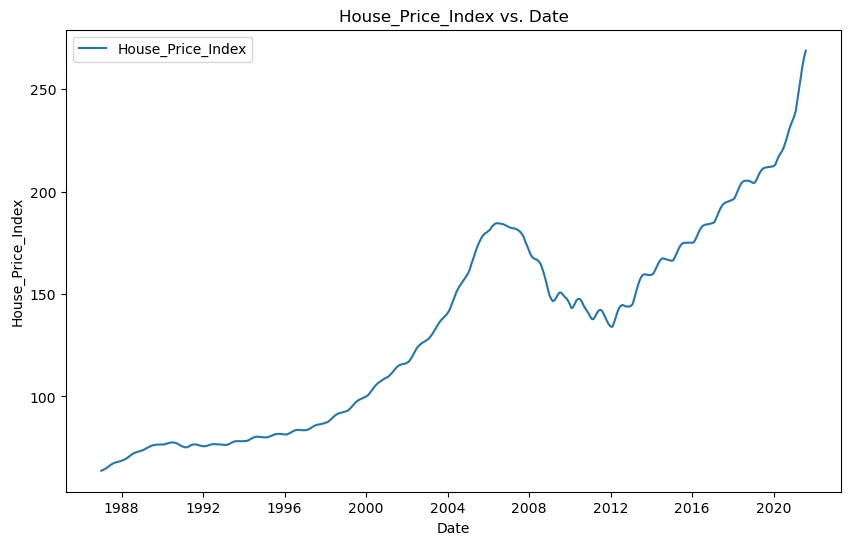

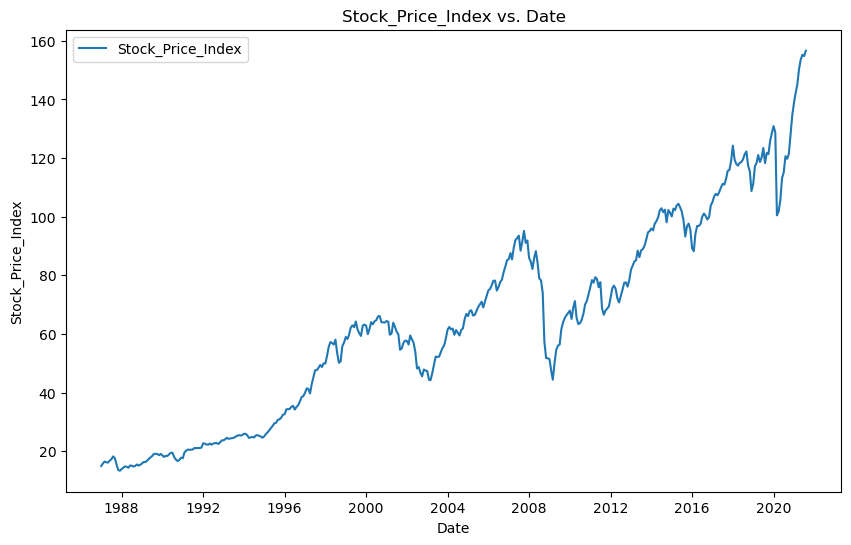

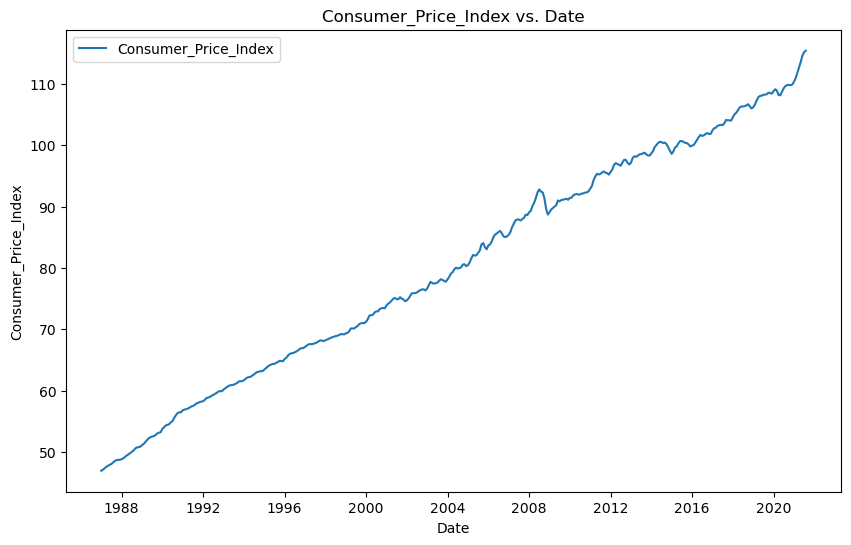

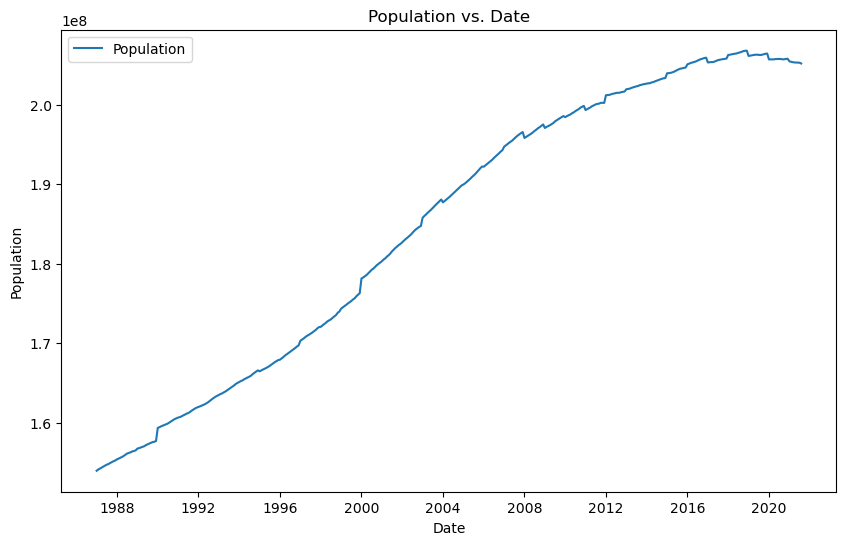

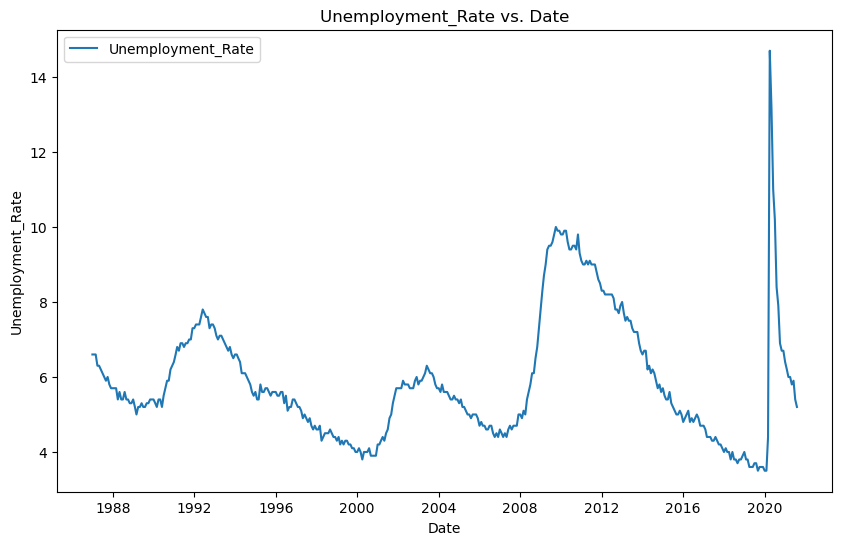

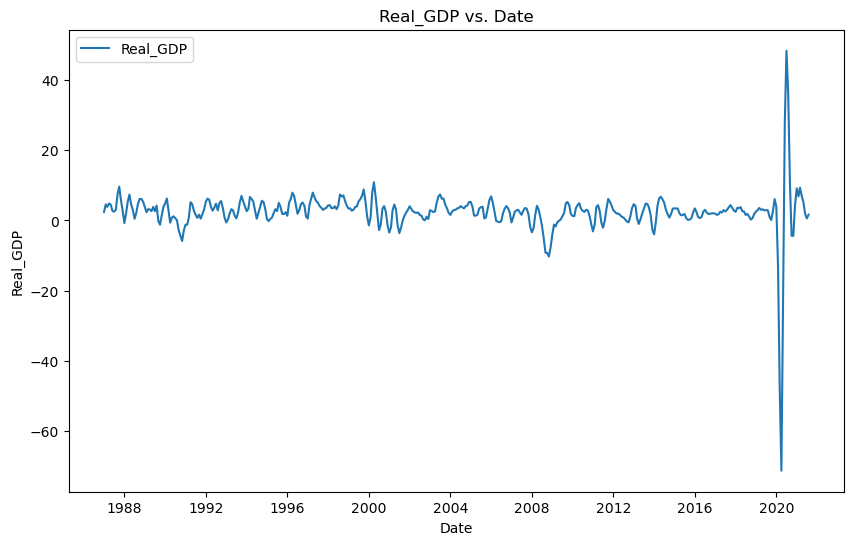

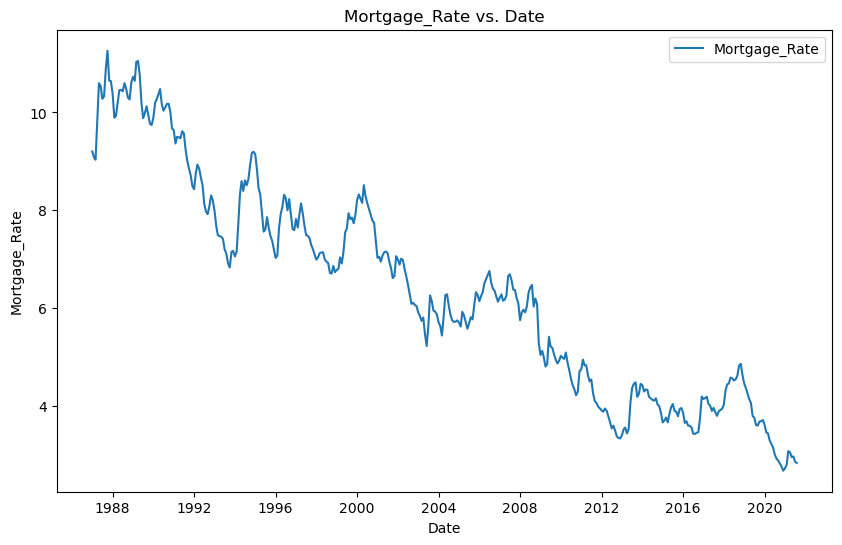

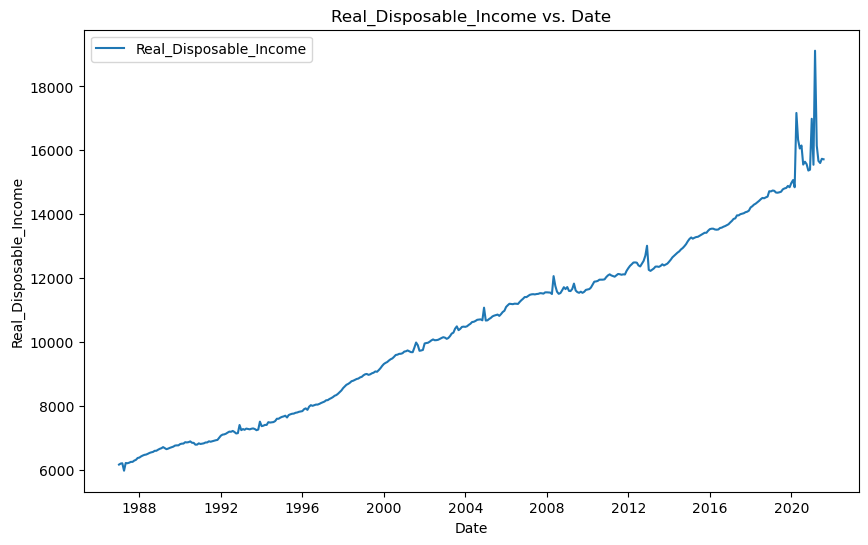

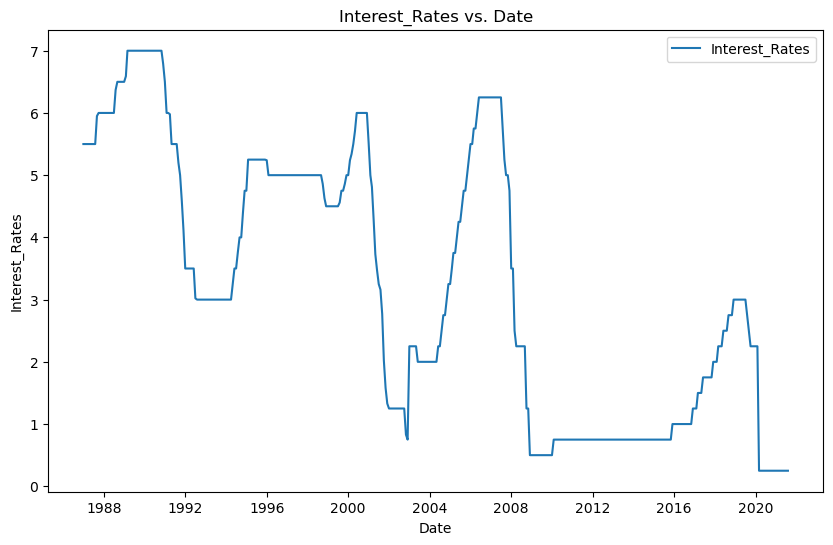

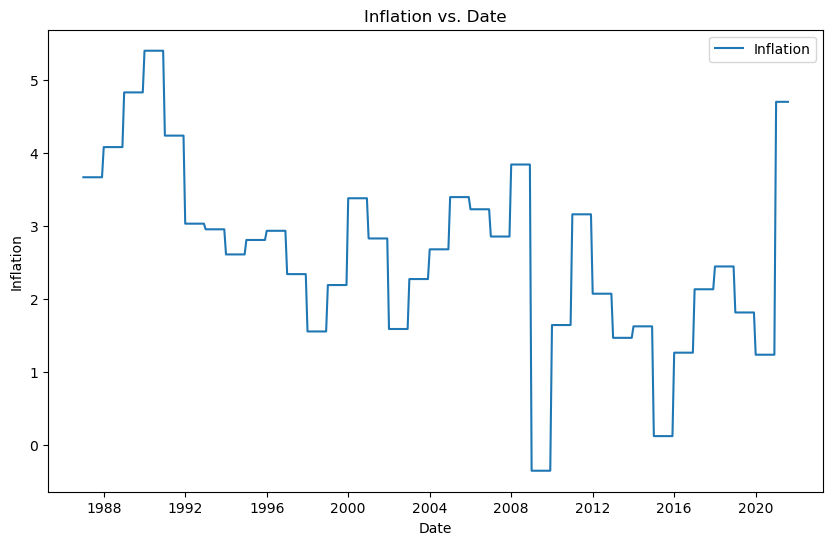

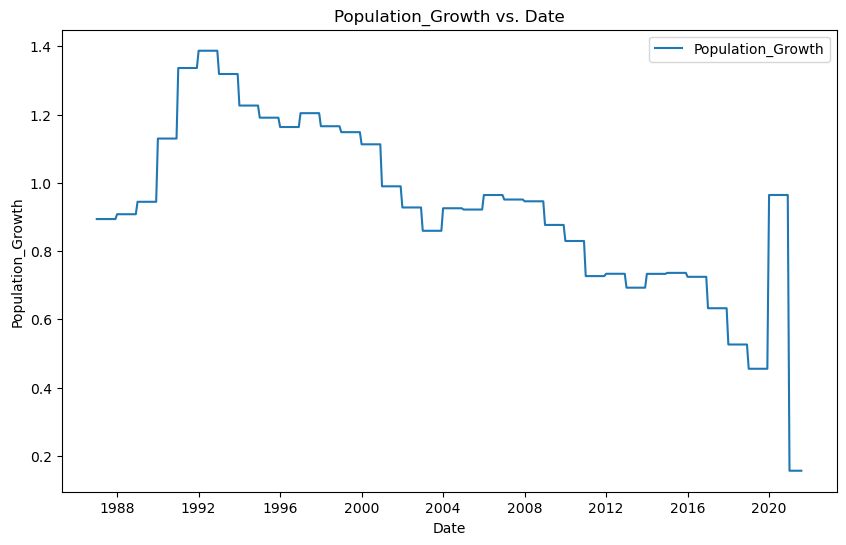

In [32]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the 'DATE' column as the index (if not already)
df.set_index('DATE', inplace=True)

# Ploting each float column against the datetime column
for column in df.columns:
    if df[column].dtype == 'float64':  # Check if the column is of float type
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df[column], label=column)
        plt.title(f'{column} vs. Date')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.legend()
        plt.show()

# 

## Checking Contribution Score

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

In [34]:
df.columns

Index(['GDP', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index',
       'Population', 'Unemployment_Rate', 'Real_GDP', 'Mortgage_Rate',
       'Real_Disposable_Income', 'Interest_Rates', 'Inflation',
       'Population_Growth'],
      dtype='object')

In [35]:
df.shape

(416, 12)

In [36]:
x = df.drop(columns = ['House_Price_Index'])
y = df['House_Price_Index']

In [37]:
best_features = SelectKBest(score_func=f_classif, k='all')

fit = best_features.fit(x,y)

dt_scores = pd.DataFrame(fit.scores_) 
dt_columns = pd.DataFrame(x.columns) 

feature_scores = pd.concat([dt_columns, dt_scores], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']
print(feature_scores.nlargest(11, 'Score'))

              Feature_Name        Score
0                      GDP  5506.100811
3               Population  4020.397792
2     Consumer_Price_Index  1981.343412
7   Real_Disposable_Income  1335.498224
1        Stock_Price_Index   245.254670
4        Unemployment_Rate   218.471778
10       Population_Growth   178.619063
8           Interest_Rates    60.407812
6            Mortgage_Rate    35.661769
5                 Real_GDP     8.218272
9                Inflation     4.408821


##### The contribution scores of columns 'Inflation' & 'Real_GDP' are too less, so we can remove these columns.

In [38]:
df = df.drop(columns = ['Inflation', 'Real_GDP'])
df.head()

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
DATE,,,,,,,,,,
1987-01-01,4722.156,63.735,14.97068,46.91647,153968000.0,6.6,9.2040,6159.5,5.5,0.893829
1987-02-01,4722.156,64.134,15.86818,47.08523,154123000.0,6.6,9.0825,6192.1,5.5,0.893829
1987-03-01,4722.156,64.470,16.48206,47.29619,154229000.0,6.6,9.0350,6200.0,5.5,0.893829
1987-04-01,4806.160,64.974,16.22884,47.54933,154362000.0,6.3,9.8325,5967.2,5.5,0.893829
1987-05-01,4806.160,65.549,16.14232,47.71810,154490000.0,6.3,10.5960,6209.1,5.5,0.893829


In [39]:
df.columns

Index(['GDP', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index',
       'Population', 'Unemployment_Rate', 'Mortgage_Rate',
       'Real_Disposable_Income', 'Interest_Rates', 'Population_Growth'],
      dtype='object')

In [40]:
df.shape

(416, 10)

# 

## Removing Outliners

In [41]:
df.describe()

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
count,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000,416.000000,416.000000,416.000000,416.000000
mean,12535.575959,132.635087,63.852528,80.322240,1.848358e+08,5.889663,6.373083,10447.097356,3.244423,0.933215
std,5226.617101,49.420455,34.373933,18.614505,1.765276e+07,1.648574,2.193070,2778.444209,2.167255,0.248906
min,4722.156000,63.735000,13.357500,46.916470,1.539680e+08,3.500000,2.684000,5967.200000,0.250000,0.156747
25%,7683.125000,81.424000,30.483310,64.605067,1.674218e+08,4.700000,4.335625,7775.650000,0.957500,0.735563
50%,12112.815000,137.884500,62.641115,79.551255,1.883395e+08,5.550000,6.271000,10596.450000,3.000000,0.927797
75%,16477.361500,173.367750,88.610512,97.604602,2.017260e+08,6.700000,7.916875,12395.450000,5.000000,1.148340
max,23828.973000,268.855000,156.607790,115.420830,2.067800e+08,14.700000,11.260000,19119.500000,7.000000,1.386886


#### Visualization of Outliners

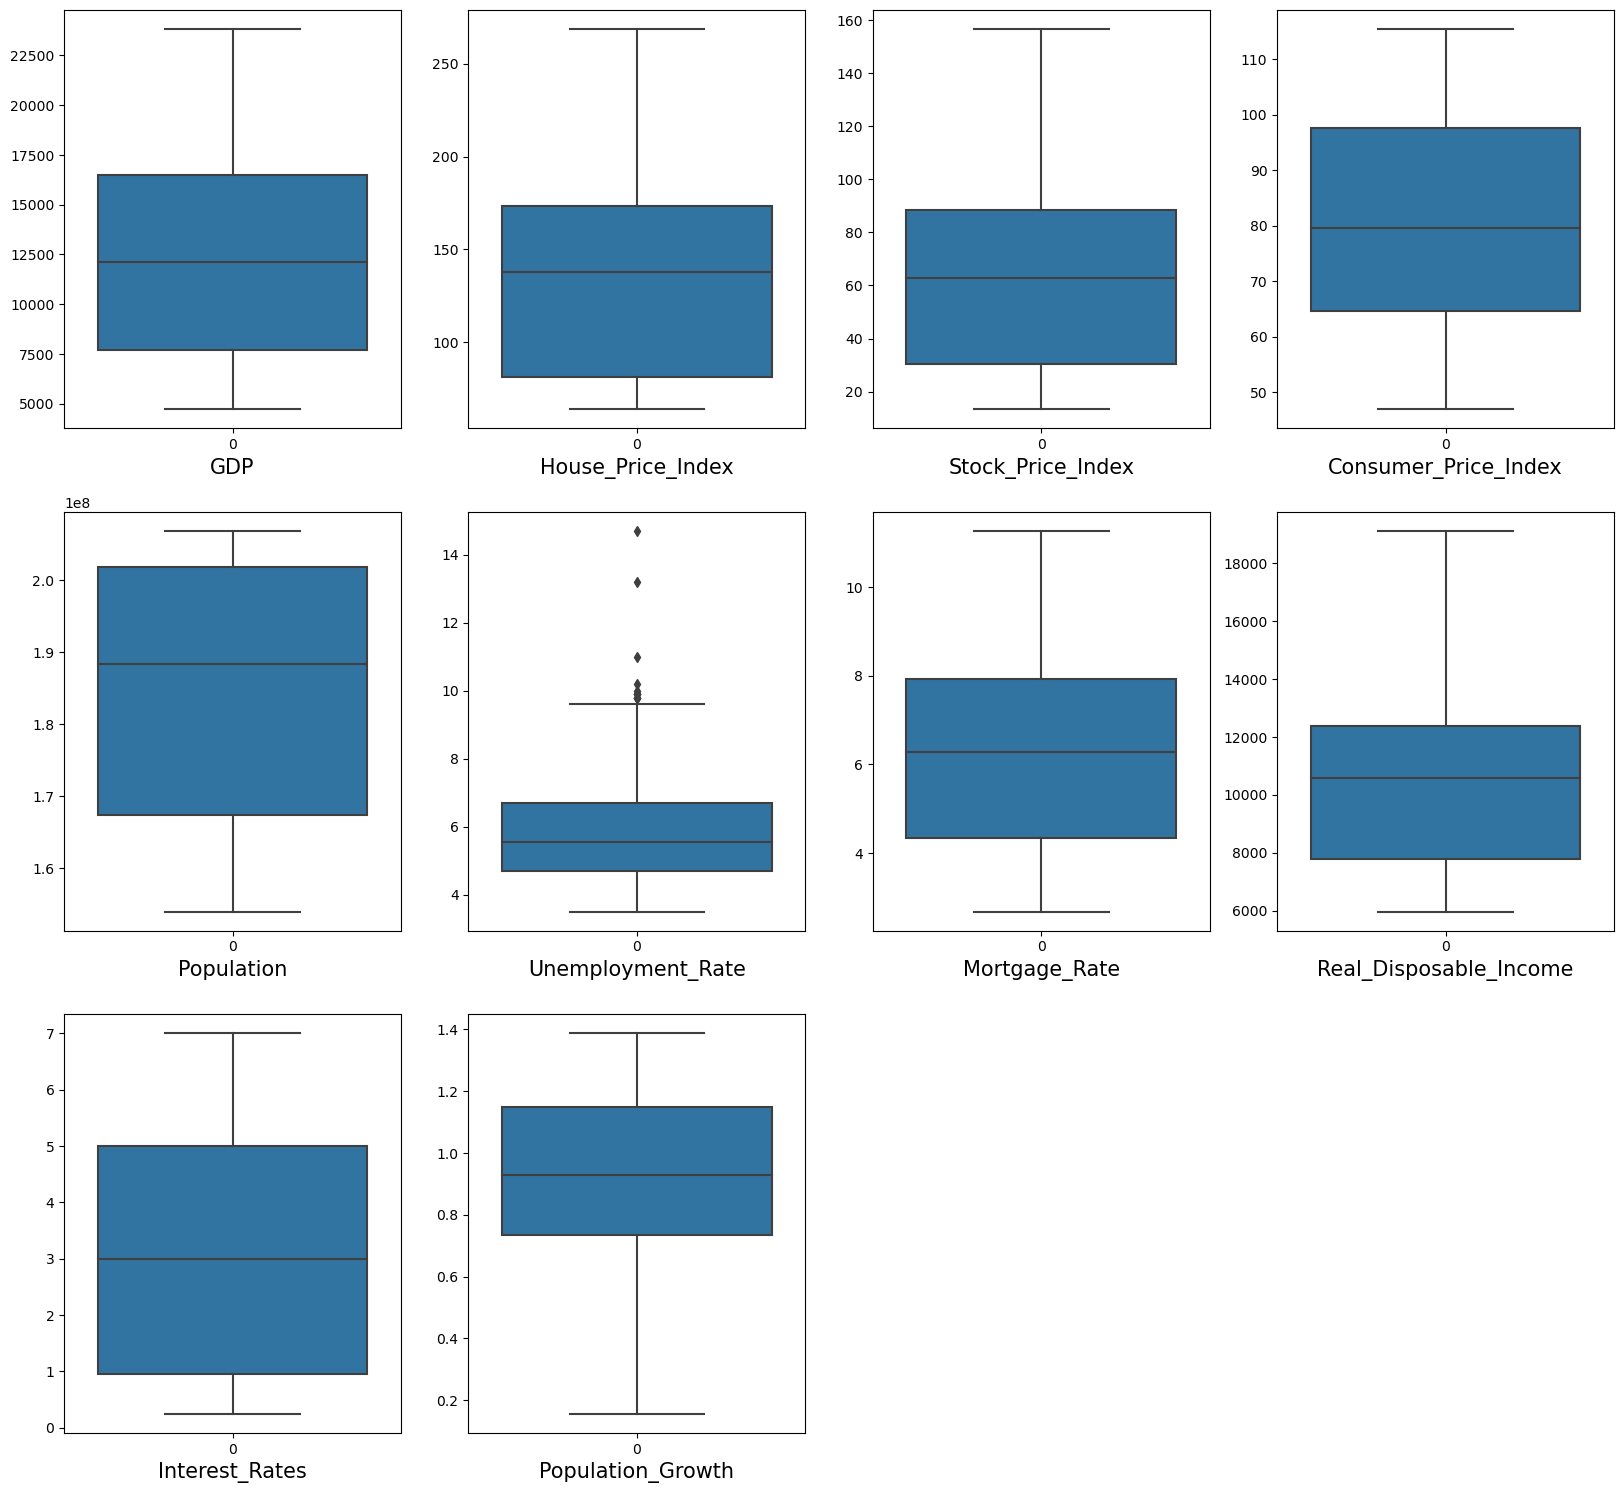

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
graph = 1

for column in df: 
    if graph<=16:
        plt.subplot(4,4, graph)
        ax=sns.boxplot(data= df[column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

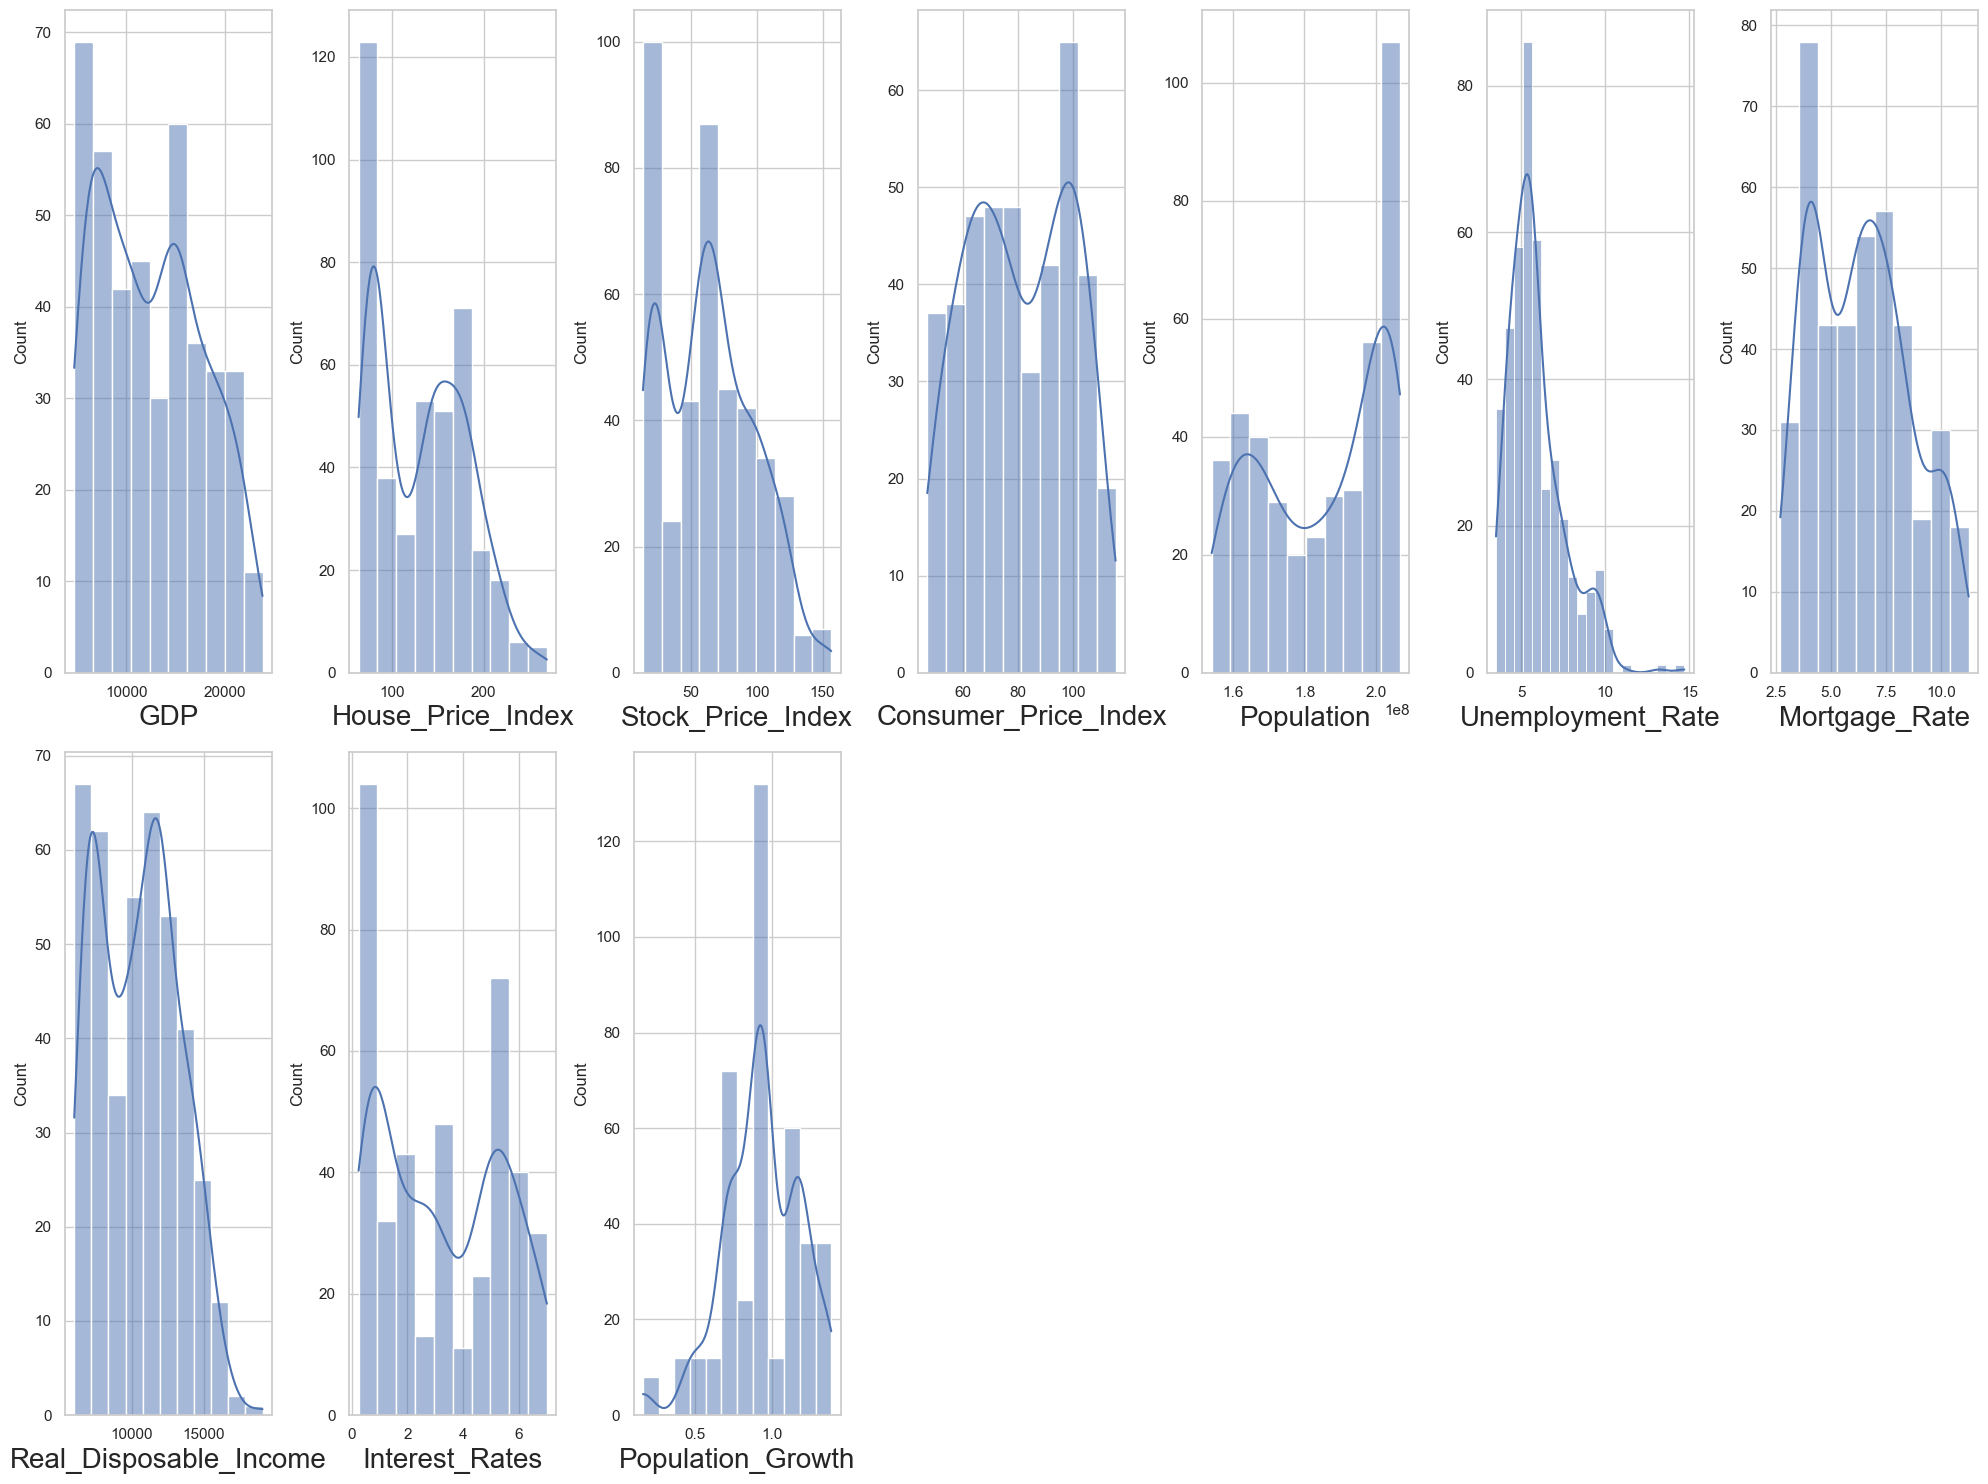

In [43]:
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(2, 7, plotnumber)
        sns.histplot(df[column], kde=True)
        plt.xlabel(column, fontsize=20)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['GDP', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index',
       'Population', 'Unemployment_Rate', 'Mortgage_Rate',
       'Real_Disposable_Income', 'Interest_Rates', 'Population_Growth'],
      dtype='object')

###### We could clearly see from the table & graphs that columns 'Unemployment_Rate' has outliners, which needs to be removed. 

In [45]:
from scipy.stats import zscore 

z_score = zscore(df[['Unemployment_Rate']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2.7).all(axis=1)
df = df[filtering_entry]

df.describe()

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
count,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000
mean,12481.985884,132.011024,63.540014,80.118489,1.846840e+08,5.838257,6.395887,10402.981840,3.266174,0.932989
std,5207.421385,49.051221,34.299170,18.527051,1.762636e+07,1.534091,2.184551,2739.307698,2.159961,0.249797
min,4722.156000,63.735000,13.357500,46.916470,1.539680e+08,3.500000,2.684000,5967.200000,0.250000,0.156747
25%,7683.125000,81.412000,29.713810,64.510140,1.673100e+08,4.700000,4.346000,7756.600000,1.000000,0.733600
50%,11923.447000,137.742000,62.402790,79.066060,1.880770e+08,5.500000,6.285000,10533.600000,3.000000,0.927797
75%,16420.419000,171.856000,88.416600,97.157590,2.015700e+08,6.600000,7.922500,12379.600000,5.000000,1.148340
max,23828.973000,268.855000,156.607790,115.420830,2.067800e+08,10.200000,11.260000,19119.500000,7.000000,1.386886


In [46]:
df.shape

(413, 10)

# 

## Checking Skewness

In [47]:
df.skew()

GDP                       0.275626
House_Price_Index         0.347412
Stock_Price_Index         0.355850
Consumer_Price_Index     -0.023610
Population               -0.279193
Unemployment_Rate         0.940586
Mortgage_Rate             0.295083
Real_Disposable_Income    0.188428
Interest_Rates            0.155627
Population_Growth        -0.459565
dtype: float64

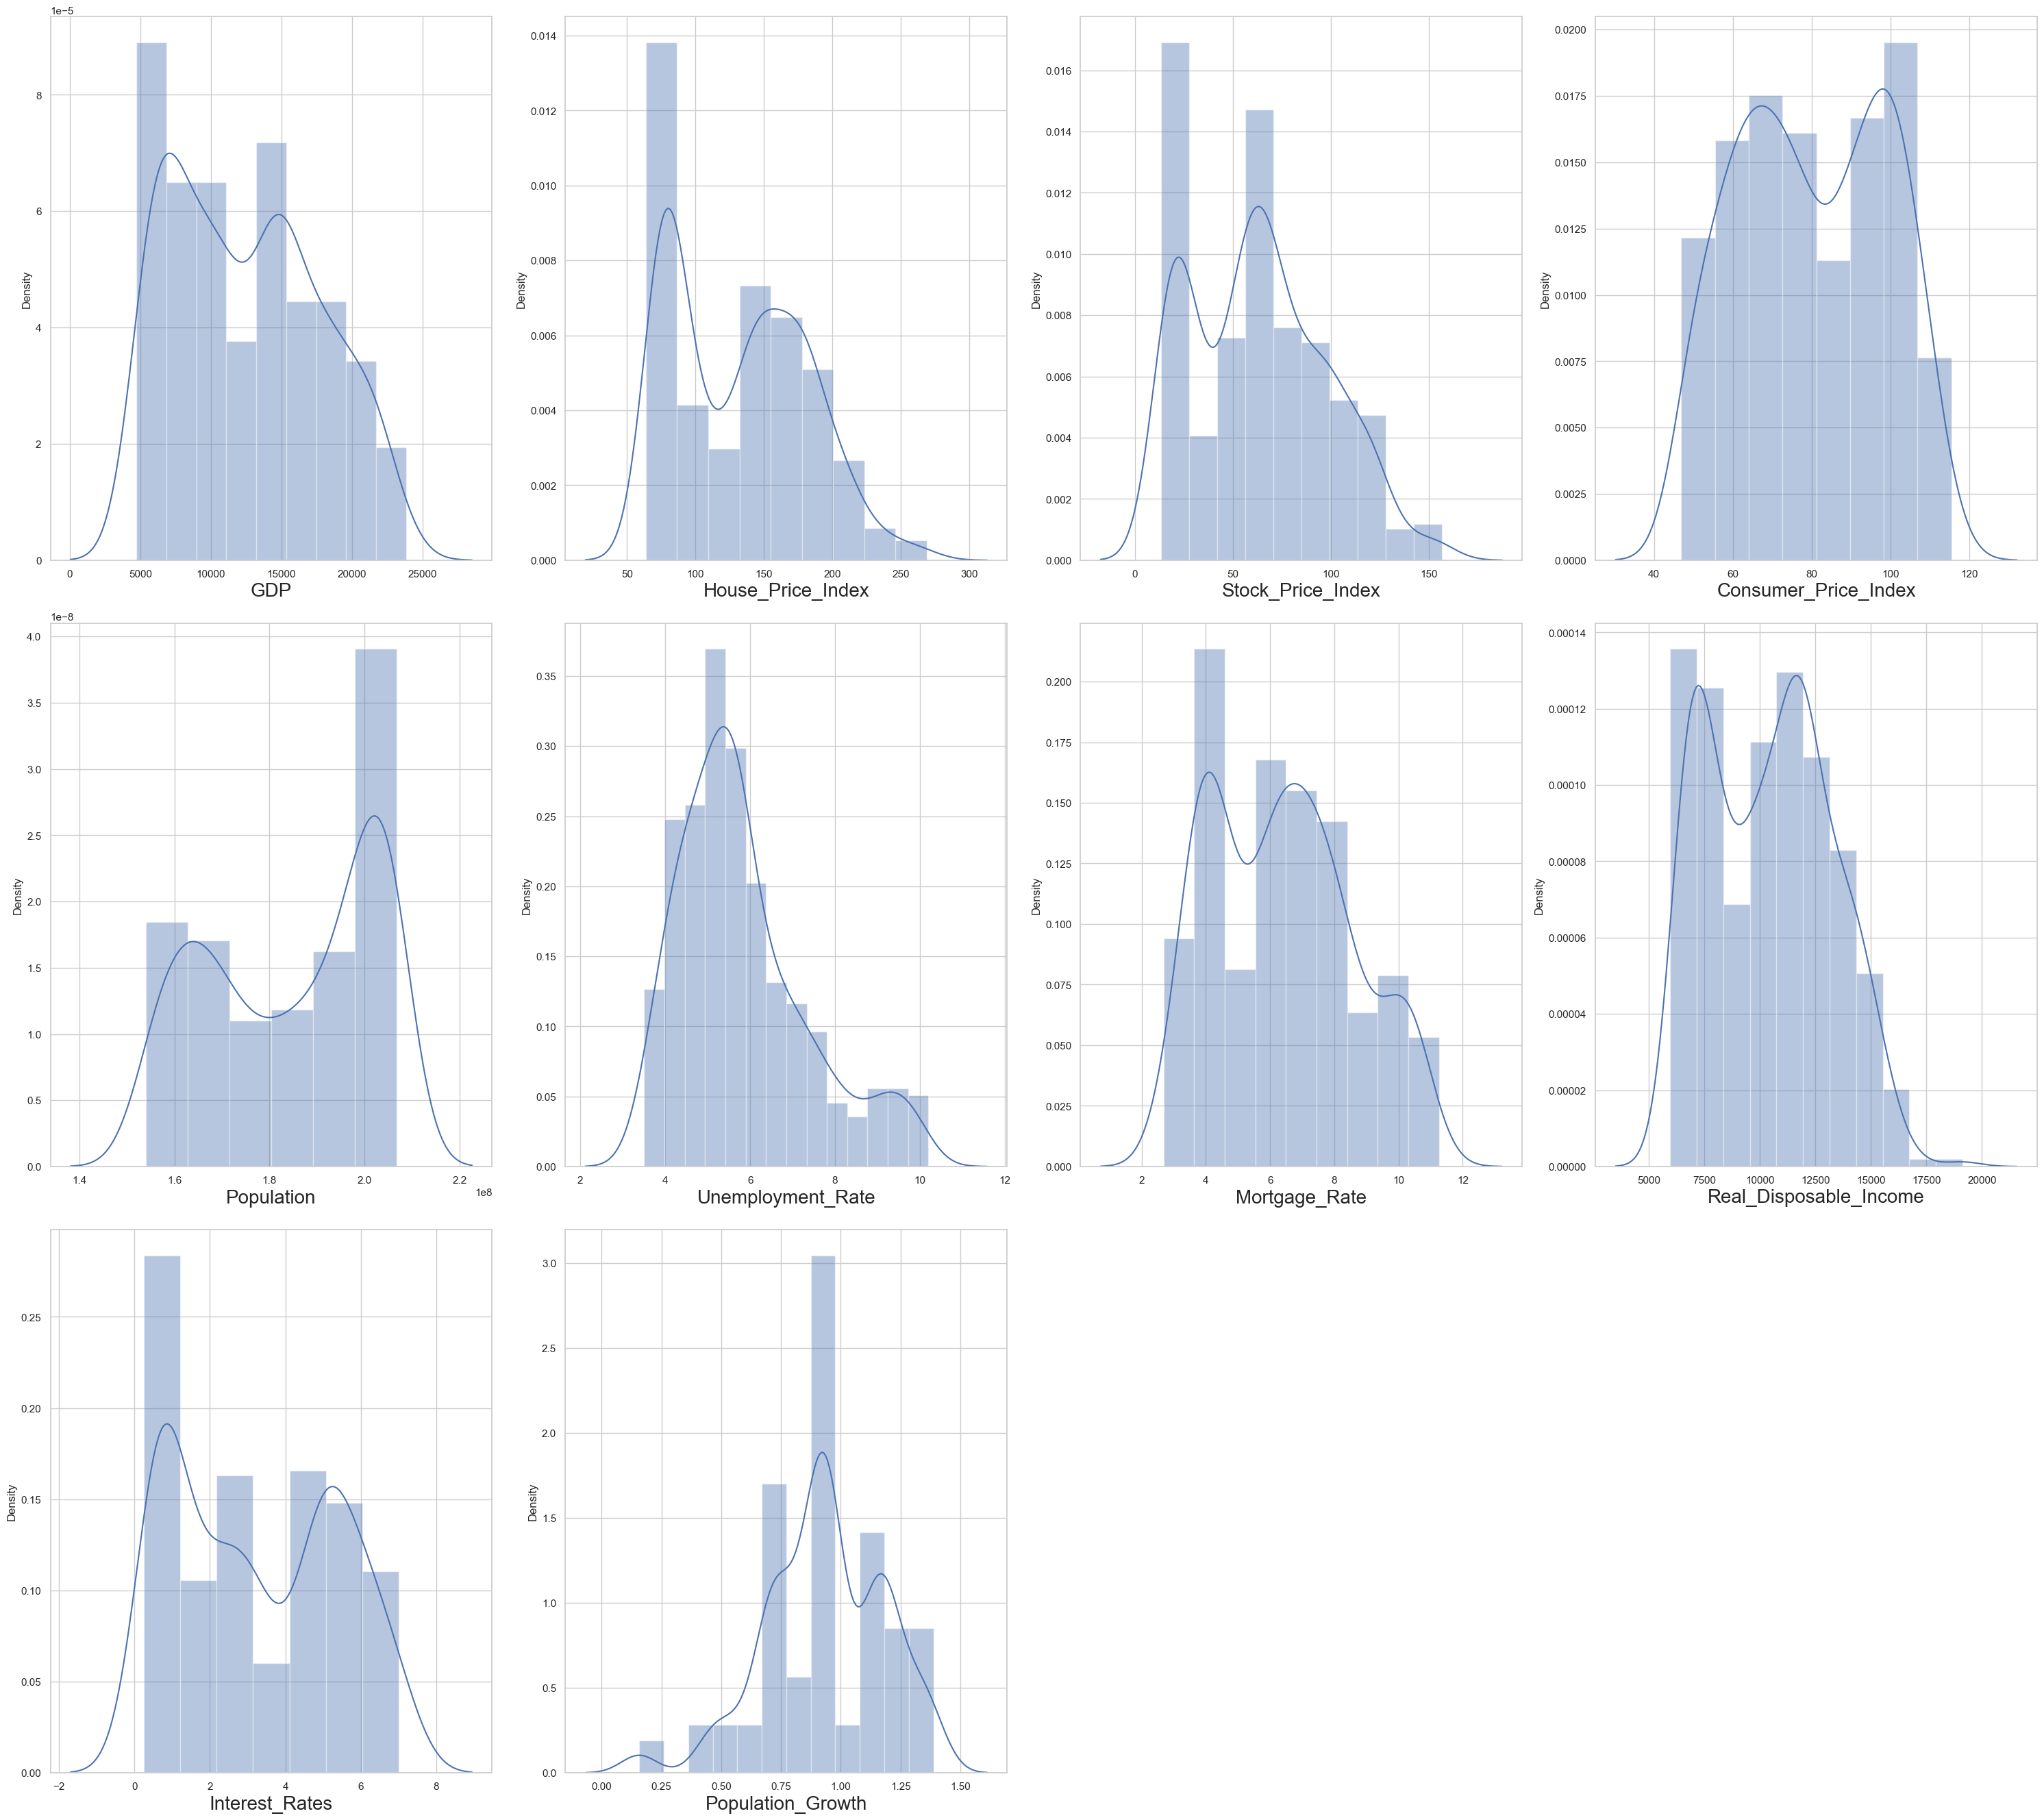

In [48]:
plt.figure(figsize=(30,35), facecolor='White')
plotnumber = 1

for column in df:                       
    if plotnumber<=16:                    
        ax = plt.subplot(4,4,plotnumber)    
        sns.distplot(df[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()  

##### We could clearly see column 'Unemployment_Rate' has skewness, which needs to be removed.

In [49]:
df.columns

Index(['GDP', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index',
       'Population', 'Unemployment_Rate', 'Mortgage_Rate',
       'Real_Disposable_Income', 'Interest_Rates', 'Population_Growth'],
      dtype='object')

In [50]:
df['Unemployment_Rate'] = np.log(df['Unemployment_Rate'])
df['Unemployment_Rate'].skew()

0.4051719526982125

# 

## Checking Multi-colinearity

In [51]:
corr = df.corr()
corr

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
GDP,1.000000,0.952661,0.966161,0.991231,0.965703,-0.098287,-0.929950,0.993948,-0.711380,-0.812562
House_Price_Index,0.952661,1.000000,0.942257,0.933261,0.921569,-0.170447,-0.850159,0.954665,-0.585211,-0.782930
Stock_Price_Index,0.966161,0.942257,1.000000,0.948701,0.915932,-0.262582,-0.870680,0.962510,-0.591369,-0.776201
Consumer_Price_Index,0.991231,0.933261,0.948701,1.000000,0.984945,-0.035787,-0.953757,0.988450,-0.749438,-0.772767
Population,0.965703,0.921569,0.915932,0.984945,1.000000,-0.013278,-0.947178,0.970156,-0.747095,-0.754288
Unemployment_Rate,-0.098287,-0.170447,-0.262582,-0.035787,-0.013278,1.000000,-0.091474,-0.088824,-0.433937,0.085716
Mortgage_Rate,-0.929950,-0.850159,-0.870680,-0.953757,-0.947178,-0.091474,1.000000,-0.933726,0.836856,0.692604
Real_Disposable_Income,0.993948,0.954665,0.962510,0.988450,0.970156,-0.088824,-0.933726,1.000000,-0.719657,-0.807326
Interest_Rates,-0.711380,-0.585211,-0.591369,-0.749438,-0.747095,-0.433937,0.836856,-0.719657,1.000000,0.553609
Population_Growth,-0.812562,-0.782930,-0.776201,-0.772767,-0.754288,0.085716,0.692604,-0.807326,0.553609,1.000000


In [52]:
df.columns

Index(['GDP', 'House_Price_Index', 'Stock_Price_Index', 'Consumer_Price_Index',
       'Population', 'Unemployment_Rate', 'Mortgage_Rate',
       'Real_Disposable_Income', 'Interest_Rates', 'Population_Growth'],
      dtype='object')

In [53]:
x = df.drop(columns = ['House_Price_Index'])

vif = pd.DataFrame()

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Scores"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif["variables"] = x.columns
vif = vif.sort_values(by="VIF Scores", ascending=False)

vif

,VIF Scores,variables
2,5621.253655,Consumer_Price_Index
3,3518.015039,Population
0,1694.746935,GDP
6,1641.527053,Real_Disposable_Income
4,132.532514,Unemployment_Rate
1,129.244427,Stock_Price_Index
5,121.272720,Mortgage_Rate
8,56.551341,Population_Growth
7,20.507117,Interest_Rates


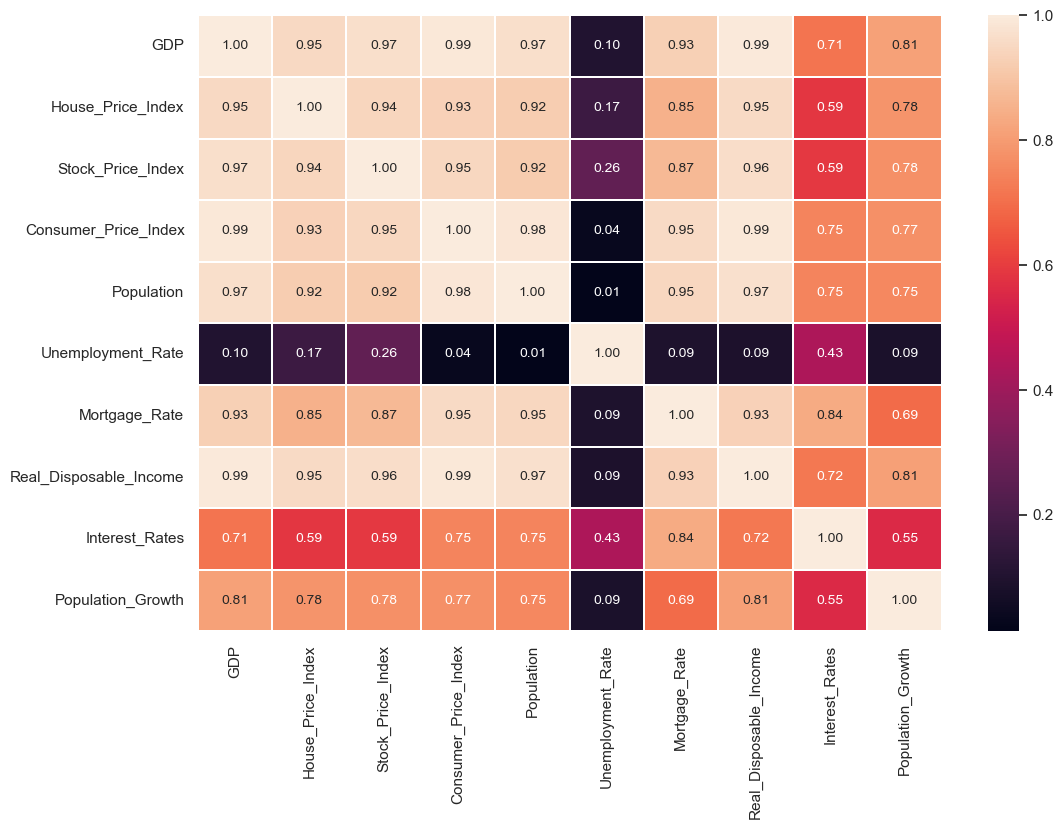

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

dt_corr = df.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(dt_corr, annot=True, annot_kws={'size' :10}, linewidths=0.1,linecolor="white", fmt="0.2f")
plt.show()

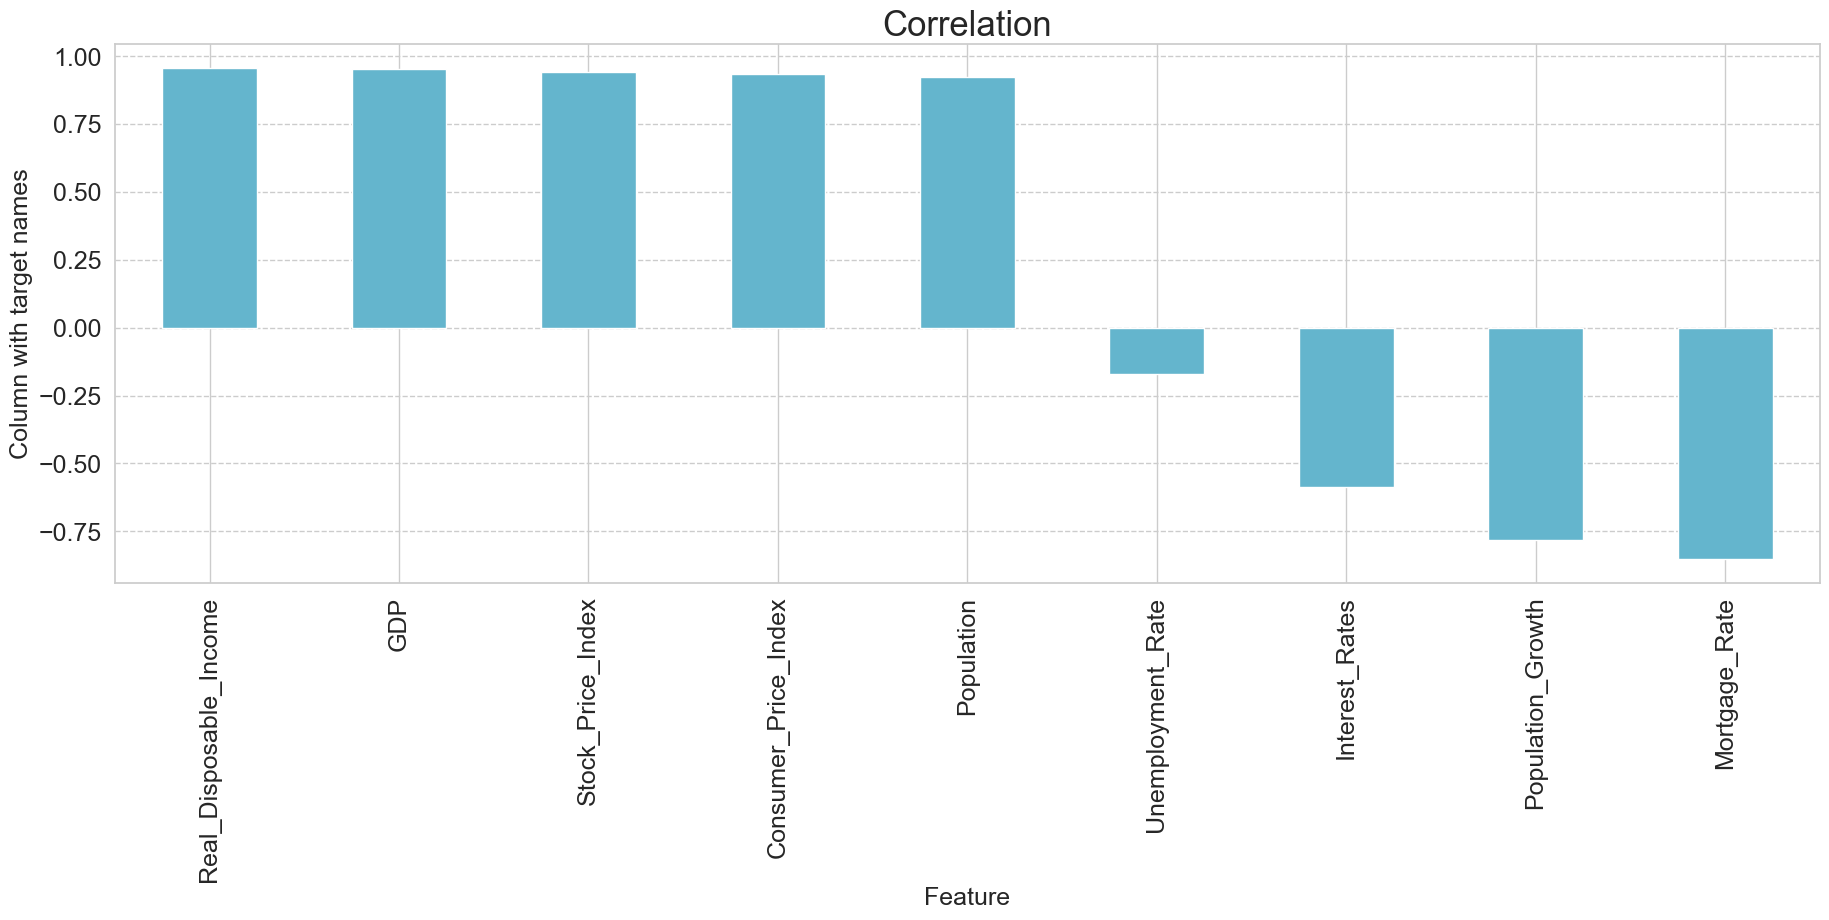

In [55]:
plt.figure(figsize=(22,7))
df.corr()['House_Price_Index'].sort_values (ascending=False).drop(['House_Price_Index']). plot (kind='bar', color='c', fontsize=18)
plt.xlabel('Feature', fontsize=18)
plt.ylabel('Column with target names', fontsize=18)
plt.title('Correlation', fontsize=25)

plt.grid(axis='y', linestyle='--', alpha=1, linewidth=1, which='both')

plt.show()

# 

## Separating Features & Target

In [56]:
x = df.drop(columns="House_Price_Index", axis = 1)
y = df["House_Price_Index"]

In [57]:
y = y.ravel()
y

array([ 63.735,  64.134,  64.47 ,  64.974,  65.549,  66.22 ,  66.787,
        67.27 ,  67.624,  67.902,  68.092,  68.344,  68.583,  68.916,
        69.325,  69.79 ,  70.409,  71.068,  71.686,  72.185,  72.574,
        72.823,  73.065,  73.279,  73.618,  73.969,  74.411,  74.868,
        75.296,  75.697,  76.043,  76.274,  76.422,  76.489,  76.522,
        76.498,  76.527,  76.587,  76.79 ,  77.038,  77.297,  77.505,
        77.56 ,  77.479,  77.229,  76.913,  76.381,  75.972,  75.533,
        75.25 ,  75.137,  75.318,  75.769,  76.254,  76.518,  76.595,
        76.576,  76.291,  76.031,  75.844,  75.699,  75.654,  75.813,
        76.08 ,  76.398,  76.602,  76.711,  76.731,  76.628,  76.598,
        76.579,  76.464,  76.395,  76.328,  76.383,  76.661,  77.03 ,
        77.516,  77.885,  78.131,  78.198,  78.172,  78.17 ,  78.114,
        78.199,  78.205,  78.35 ,  78.702,  79.209,  79.702,  80.064,
        80.317,  80.34 ,  80.304,  80.17 ,  80.079,  80.027,  79.993,
        80.079,  80.

# 

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_unseen, y_test, y_unseen = train_test_split(x_temp, y_temp, test_size=0.03, random_state=42)

In [60]:
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)
print("Unseen set shape:", x_unseen.shape, y_unseen.shape)

Training set shape: (330, 9) (330,)
Testing set shape: (80, 9) (80,)
Unseen set shape: (3, 9) (3,)


# 

## Standardizing Features

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [63]:
x_train

array([[ 0.3117827 ,  0.57451772,  0.26833853, ...,  0.35695345,
         1.38198731,  0.12992334],
       [-1.5296815 , -1.42219196, -1.80456541, ..., -1.59869159,
         1.02894464, -0.15782612],
       [-1.29064395, -1.42675962, -1.33345108, ..., -1.37755563,
         1.73502998,  0.80571994],
       ...,
       [ 0.39341588, -0.22922841,  0.59460863, ...,  0.43563777,
        -1.32467315, -0.22801358],
       [ 1.20652302,  0.7622256 ,  1.10258821, ...,  1.183841  ,
        -1.08931137, -0.84897159],
       [-0.95591365, -1.03803059, -0.88589188, ..., -1.0101344 ,
         0.91126375,  1.05551882]])

In [64]:
x_test

array([[-0.58814902, -0.12143102, -0.52119777, -0.54341345, -1.07242012,
         0.24377793, -0.49941538,  0.85681753,  0.84272272],
       [-0.333687  ,  0.08142827, -0.29287042, -0.18220041, -1.61576461,
         0.57722272, -0.21739335,  1.30125378,  0.64449962],
       [-0.85100595, -0.95255679, -0.80141782, -0.88711061, -0.10883218,
         1.04968994, -0.88639344,  0.41238128,  1.06953441],
       [ 0.55530503,  0.4901366 ,  0.7637862 ,  0.85295723,  1.60136962,
        -0.65829998,  0.58364926, -1.03203652, -0.80058189],
       [ 1.16832792,  1.03740436,  1.10517666,  1.17606279, -0.90731001,
        -1.10568045,  1.10908766, -0.92092746, -0.80848392],
       [-0.27332685, -0.12176001, -0.21399377, -0.02064763, -0.17486748,
         0.19987611, -0.1057562 , -0.8098184 , -0.04801637],
       [-0.95049477, -0.96124402, -0.89897581, -0.98668008,  0.495126  ,
         0.29186088, -0.98608357, -0.03205496,  1.41541111],
       [ 1.13417968,  1.04127276,  1.09012808,  1.15865117, -0

In [65]:
x_unseen.head(2)

,GDP,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
DATE,,,,,,,,,
1989-07-01,5695.365,18.33109,52.48569,157284000.0,1.648659,9.8825,6683.9,7.00,0.944406
2019-11-01,21902.390,125.88704,108.51880,206400000.0,1.280934,3.6950,14885.9,2.25,0.455381


# 

## Model Training

### RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 32)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=32)

In [67]:
print(f"Score:{rf_model.score(x_test, y_test)}")

Score:0.9895537242590955


#### Cross - validation

In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [69]:
c1=cross_val_score (rf_model, x_train, y_train, cv=5)
c1

array([0.99814765, 0.99909588, 0.99881754, 0.99830033, 0.99490257])

In [70]:
c1.mean()

0.9978527927260956

In [71]:
c2=cross_val_score(rf_model, x_test, y_test, cv=5)
c2

array([0.99837572, 0.99650851, 0.96414507, 0.99041251, 0.99698125])

In [72]:
c2.mean()

0.9892846117792946

#### Printing Testing Values

In [73]:
y_pred = rf_model.predict(x_test)
print(y_pred)

[ 97.72106 111.88674  82.97585 142.60045 179.27439 123.07336  81.25076
 179.14089  81.2336   94.27396 223.40343  87.92694 126.1335  139.64559
  81.21463  77.82628  76.18567 139.93217  77.01654 241.77981 194.48807
  76.55155  84.35738  74.79229  81.09558  78.89496 180.02476 203.00832
 178.94464 181.65474 198.61869  83.13854 161.81223  81.665   223.03362
 148.07883  78.48916  81.21046 178.67209 138.65051 140.71701 153.41593
  76.13246 138.58016 138.96813 179.79786  77.97815 183.18252 165.88222
 148.378   116.35949 139.91492 236.03907  86.23136  81.09765 188.00146
  91.96203 159.44434  76.99846 206.60074  80.47047  99.35673 138.72046
  77.49891 146.3375  145.55284 148.46832  87.22539 177.60277 148.49447
  75.95856 217.76138 195.55305  76.7481   76.21552  81.85242 180.27195
  79.14683  98.88932  82.50388]


#### Checking Error Score

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
mse = mean_squared_error(y_test,y_pred)
print('MSE',mse)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE',rmse)

mae = mean_absolute_error(y_test,y_pred)
print('MAE',mae)

MSE 29.299060033758344
RMSE 5.412860614661931
MAE 4.277477874999972


#### Checking R2 Score

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2s = r2_score(y_test,y_pred)
print('R2_Score',r2s)

R2_Score 0.9895537242590955


#### Comparing y_test Vs y_pred

In [78]:
df_y_test = pd.DataFrame({'y_test_original_scale': y_test})
df_y_pred = pd.DataFrame({'y_pred_original_scale': y_pred})

# Concatenate y_test and y_pred into a single DataFrame
result_df = pd.concat([df_y_test, df_y_pred], axis=1)
result_df

,y_test_original_scale,y_pred_original_scale
0,90.195,97.72106
1,107.728,111.88674
2,80.304,82.97585
3,139.161,142.60045
4,184.246,179.27439
...,...,...
75,78.199,81.85242
76,186.546,180.27195
77,76.291,79.14683
78,92.001,98.88932


#### Ploting y_test Vs y_pred

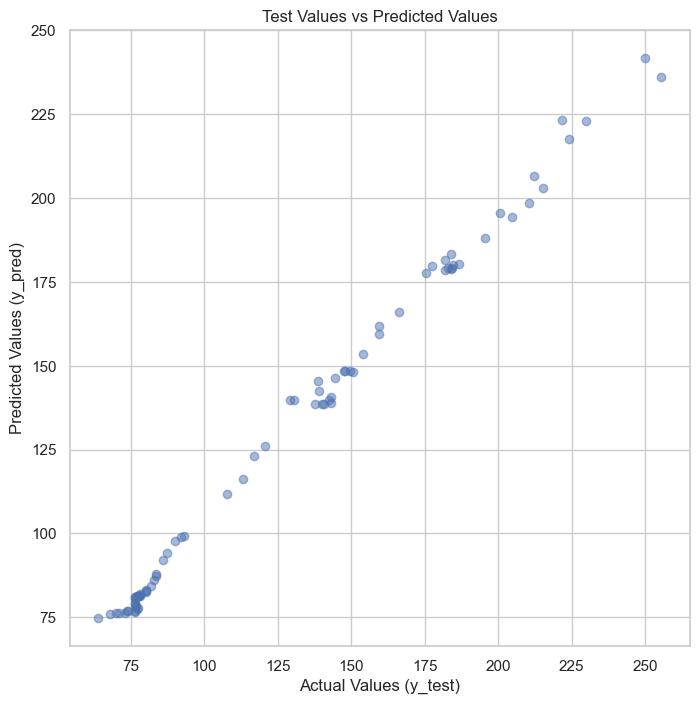

In [79]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Test Values vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

# 

## Future Prediction

#### Checking Prediction on Random Data

In [80]:
# Set a random seed for reproducibility
np.random.seed(42)

# Print a random portion (e.g., 3 rows) of the DataFrame
random_sample = df.sample(n=3)

random_sample

,GDP,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
DATE,,,,,,,,,,
2019-11-01,21902.390,212.154,125.88704,108.51880,206400000.0,1.280934,3.695,14885.9,2.25,0.455381
2016-02-01,18525.933,175.301,88.24099,100.03966,205152000.0,1.589235,3.660,13546.1,1.00,0.724676
2020-08-01,21647.640,224.086,120.63801,109.66218,205742000.0,2.128232,2.935,15553.9,0.25,0.964348


In [81]:
rf_model.predict(scaler.transform([[21902.390,125.88704,108.51880,206400000.0,1.280934,3.695,14885.9,2.25,0.455381]]))

array([206.86948])

In [82]:
rf_model.predict(scaler.transform([[18525.933,88.24099,100.03966,205152000.0,1.589235,3.660,13546.1,1.00,0.724676]]))

array([177.60277])

In [83]:
rf_model.predict(scaler.transform([[21647.640,120.63801,109.66218,205742000.0,2.128232,2.935,15553.9,0.25,0.964348]]))

array([217.76138])

#### Prediction on Unseen Data

In [84]:
x_unseen

,GDP,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Mortgage_Rate,Real_Disposable_Income,Interest_Rates,Population_Growth
DATE,,,,,,,,,
1989-07-01,5695.365,18.33109,52.48569,157284000.0,1.648659,9.8825,6683.9,7.00,0.944406
2019-11-01,21902.390,125.88704,108.51880,206400000.0,1.280934,3.6950,14885.9,2.25,0.455381
2020-09-01,21647.640,119.74555,109.81491,205692000.0,2.066863,2.8900,15643.4,0.25,0.964348


In [85]:
y_unseen

array([ 76.043, 212.154, 226.845])

In [86]:
rf_model.predict(scaler.transform([[5695.365, 18.33109, 52.48569, 157284000.0, 1.648659, 9.8825, 6683.9, 7.00, 0.944406]]))

array([76.53809])

In [87]:
rf_model.predict(scaler.transform([[21902.390, 125.88704, 108.51880, 206400000.0, 1.280934, 3.6950, 14885.9, 2.25, 0.455381]]))

array([206.86948])

In [88]:
rf_model.predict(scaler.transform([[21647.640, 119.74555, 109.81491, 205692000.0, 2.066863, 2.8900, 15643.4, 0.25, 0.964348]]))

array([218.34555])

# 

## Saving the Model

In [89]:
import pickle

In [90]:
with open('model_rf', 'wb') as f: 
    pickle.dump(rf_model, f)

#### Opening the Saved Model

In [91]:
with open('model_rf', 'rb') as f:
    m1 = pickle.load(f)

#### Predicting using Saved model

In [92]:
m1.predict(scaler.transform([[21647.640, 119.74555, 109.81491, 205692000.0, 2.066863, 2.8900, 15643.4, 0.25, 0.964348]]))

array([218.34555])

# 

# 